In [1]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt

In [2]:
IMAGE_SIZE = (1000,1000)

mahmoud_img = Image.open('../static/images/mahmoud.jpg').convert("L")
ibrahim_img = Image.open('../static/images/ibrahim.jpg').convert("L")

mahmoud_img = mahmoud_img.resize(IMAGE_SIZE)
ibrahim_img = ibrahim_img.resize(IMAGE_SIZE)

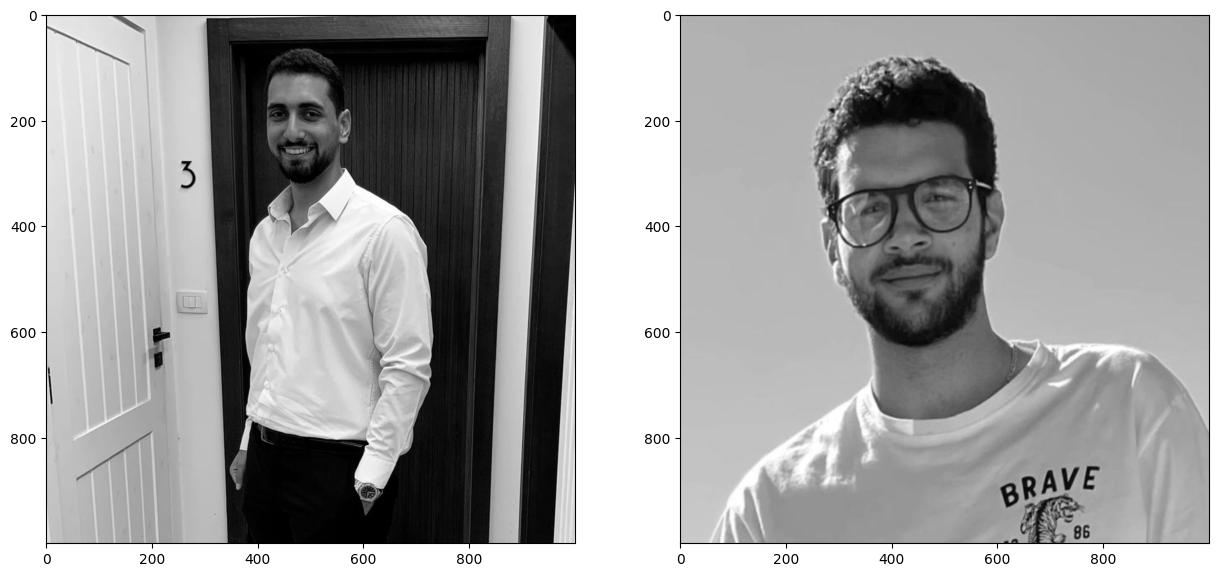

In [3]:
plt.figure(figsize=(15, 20))

plt.subplot(1,2,1)
plt.imshow(mahmoud_img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(ibrahim_img, cmap='gray')

In [4]:
mahmoud_fft = np.fft.fftshift(np.fft.fft2(mahmoud_img))
mahmoud_fft_mag = np.sqrt(np.real(mahmoud_fft) ** 2 + np.imag(mahmoud_fft) ** 2)
mahmoud_fft_phase = np.arctan2(np.imag(mahmoud_fft), np.real(mahmoud_fft))

ibrahim_fft = np.fft.fftshift(np.fft.fft2(ibrahim_img))
ibrahim_fft_mag = np.sqrt(np.real(ibrahim_fft) ** 2 + np.imag(ibrahim_fft) ** 2)
ibrahim_fft_phase = np.arctan2(np.imag(ibrahim_fft), np.real(ibrahim_fft))

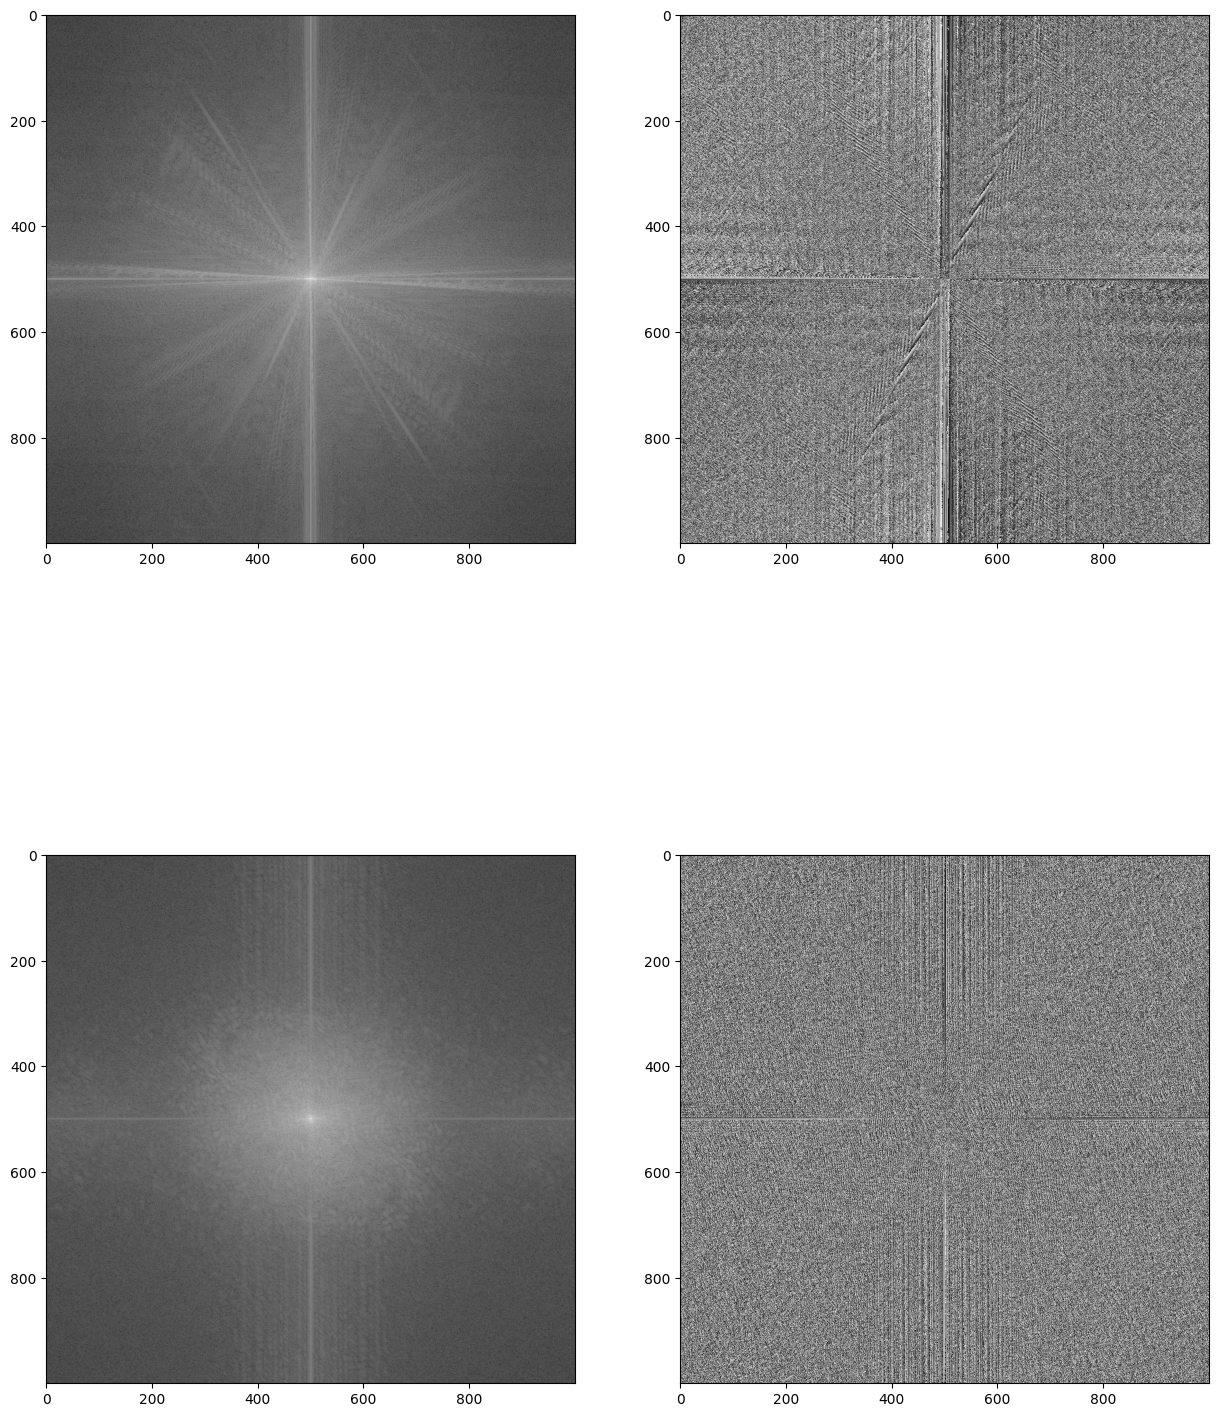

In [5]:
plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(np.log(mahmoud_fft_mag), cmap='gray')
plt.subplot(2,2,2)
plt.imshow(mahmoud_fft_phase, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(np.log(ibrahim_fft_mag), cmap='gray')
plt.subplot(2,2,4)
plt.imshow(ibrahim_fft_phase, cmap='gray')

In [6]:
# save files to show on our app
plt.imsave("mahmoud_mag.jpg", np.log(mahmoud_fft_mag))
plt.imsave("mahmoud_phase.jpg", mahmoud_fft_phase)

plt.imsave("ibrahim_mag.jpg", np.log(ibrahim_fft_mag))
plt.imsave("ibrahim_phase.jpg", ibrahim_fft_phase)

In [7]:
# make sure that we will be able to display the image
mahmoud_mag = Image.open('mahmoud_mag.jpg').convert("L")
mahmoud_phase = Image.open('mahmoud_phase.jpg').convert("L")

ibrahim_mag = Image.open('ibrahim_mag.jpg').convert("L")
ibrahim_phase = Image.open('ibrahim_phase.jpg').convert("L")

In [8]:
# mahmoud cropping window
mahmoud_mask_a = Image.new("L", mahmoud_mag.size)
mahmoud_draw_a = ImageDraw.Draw(mahmoud_mask_a)
# mahmoud_draw_a.ellipse((0,0,1000/2,1000/2), fill=1) # Crop by ellipse
mahmoud_draw_a.rounded_rectangle((0,0,1000,1000), 0, fill=1) # Crop by rectangle
mahmoud_mag.putalpha(mahmoud_mask_a)


mahmoud_mask_p = Image.new("L", mahmoud_phase.size)
mahmoud_draw_p = ImageDraw.Draw(mahmoud_mask_p)
# mahmoud_draw_p.ellipse((0,0,1000/2,1000/2), fill=1) # Crop by ellipse
mahmoud_draw_p.rounded_rectangle((0,0,1000,1000), 0, fill=1) # Crop by rectangle

mahmoud_phase.putalpha(mahmoud_mask_p)

In [9]:
# multiply window
mahmoud_mag_trans = mahmoud_fft_mag * np.array(mahmoud_mag)[:,:,1]
mahmoud_phase_trans = mahmoud_fft_phase * np.array(mahmoud_phase)[:,:,1]

In [10]:
# ibrahim cropping window
ibrahim_mask_a = Image.new("L", ibrahim_mag.size)
ibrahim_draw_a = ImageDraw.Draw(ibrahim_mask_a)
# ibrahim_draw_a.ellipse((0,0,1000/2,1000/2), fill=1) # Crop by ellipse
ibrahim_draw_a.rounded_rectangle((0,0,1000,1000), 0, fill=1) # Crop by rectangle
ibrahim_mag.putalpha(ibrahim_mask_a)


ibrahim_mask_p = Image.new("L", ibrahim_phase.size)
ibrahim_draw_p = ImageDraw.Draw(ibrahim_mask_p)
# ibrahim_draw_p.ellipse((0,0,1000/2,1000/2), fill=1) # Crop by ellipse
ibrahim_draw_p.rounded_rectangle((0,0,1000,1000), 0, fill=1) # Crop by rectangle
ibrahim_phase.putalpha(ibrahim_mask_p)

In [11]:
# multiply window
ibrahim_mag_trans = ibrahim_fft_mag * np.array(ibrahim_mag)[:,:,1]
ibrahim_phase_trans = ibrahim_fft_phase * np.array(ibrahim_phase)[:,:,1]

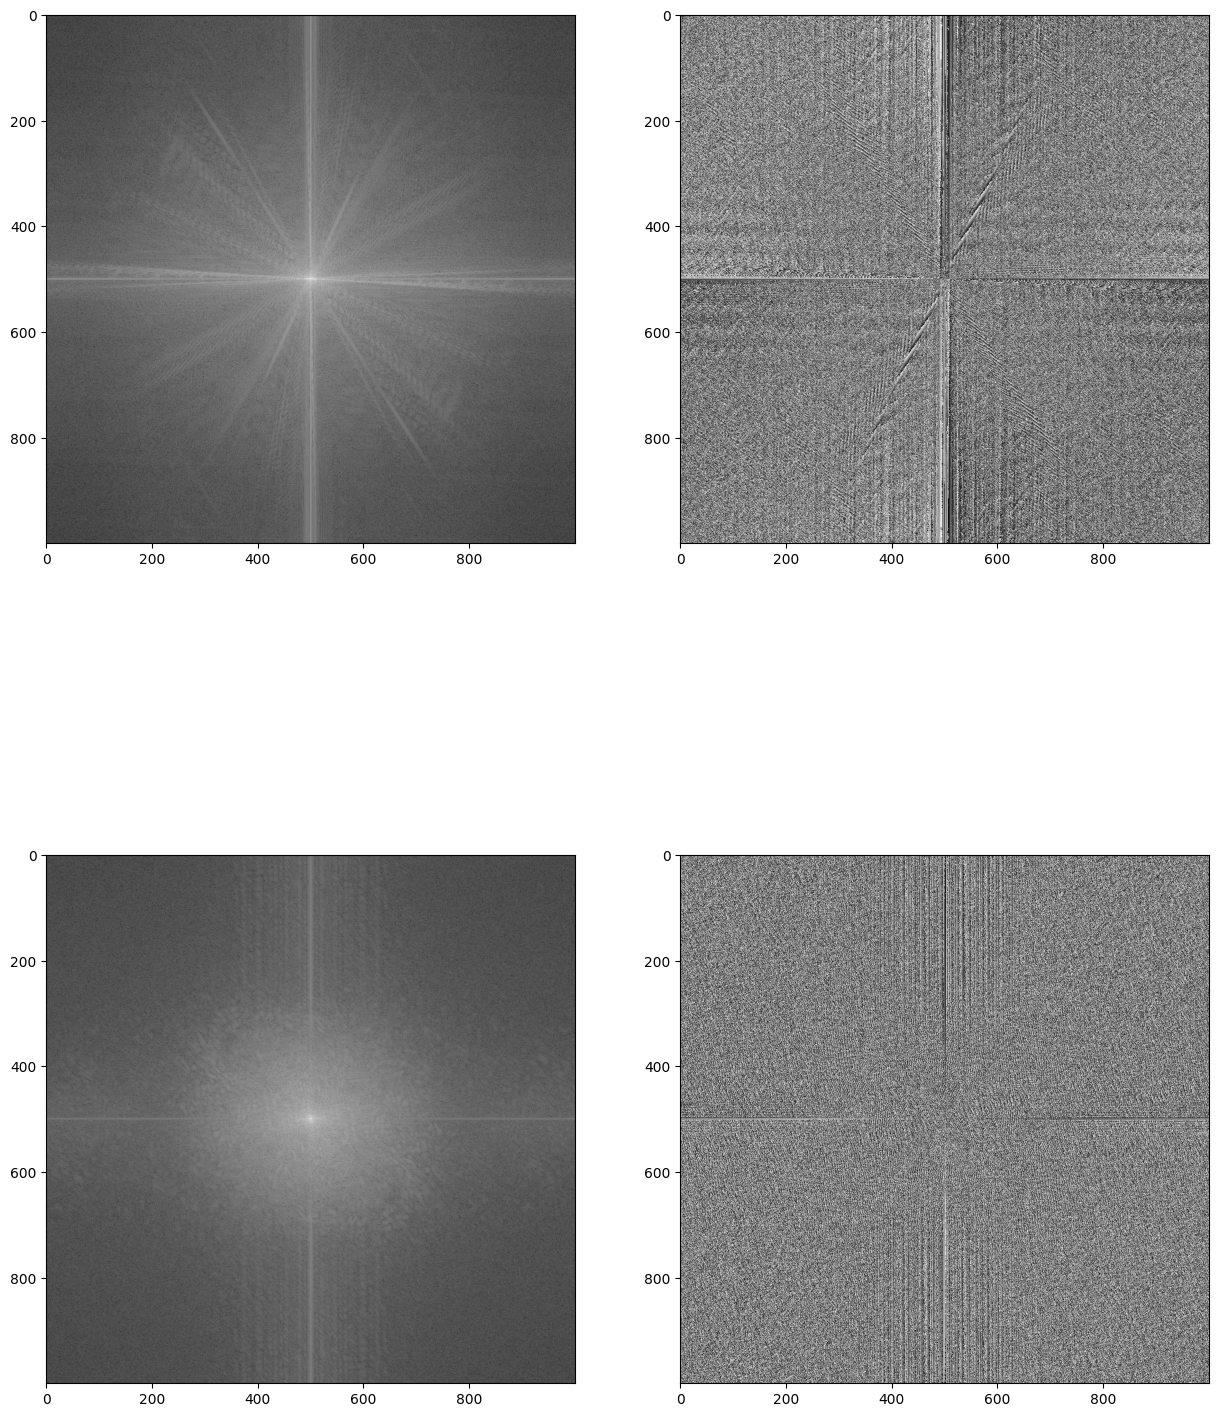

In [12]:
plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(np.log(mahmoud_mag_trans), cmap='gray')
plt.subplot(2,2,2)
plt.imshow(mahmoud_phase_trans, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(np.log(ibrahim_mag_trans), cmap='gray')
plt.subplot(2,2,4)
plt.imshow(ibrahim_phase_trans, cmap='gray')

In [13]:
mahmoud_mag_mahmoud_phase = np.multiply(mahmoud_mag_trans, np.exp(1j * mahmoud_phase_trans))

# drop imagniary as they are around 1e-14
mahmoud_mag_mahmoud_phase_inv = np.real(np.fft.ifft2(mahmoud_mag_mahmoud_phase))

In [14]:
ibrahim_mag_hema_phase = np.multiply(ibrahim_mag_trans, np.exp(1j * ibrahim_phase_trans))

# drop imagniary as they areibrahim around 1e-14
ibrahim_mag_hema_phase_inv = np.real(np.fft.ifft2(ibrahim_mag_hema_phase))

In [15]:
mahmoud_mag_hema_phase = np.multiply(mahmoud_mag_trans, np.exp(1j * ibrahim_phase_trans))

# drop imagniary as they are around 1e-14
mahmoud_mag_hema_phase_inv = np.real(np.fft.ifft2(mahmoud_mag_hema_phase))

In [16]:
hema_mag_mahmoud_phase = np.multiply(ibrahim_mag_trans, np.exp(1j * mahmoud_phase_trans))

# drop imagniary as they are around 1e-14
hema_mag_mahmoud_phase_inv = np.real(np.fft.ifft2(hema_mag_mahmoud_phase))

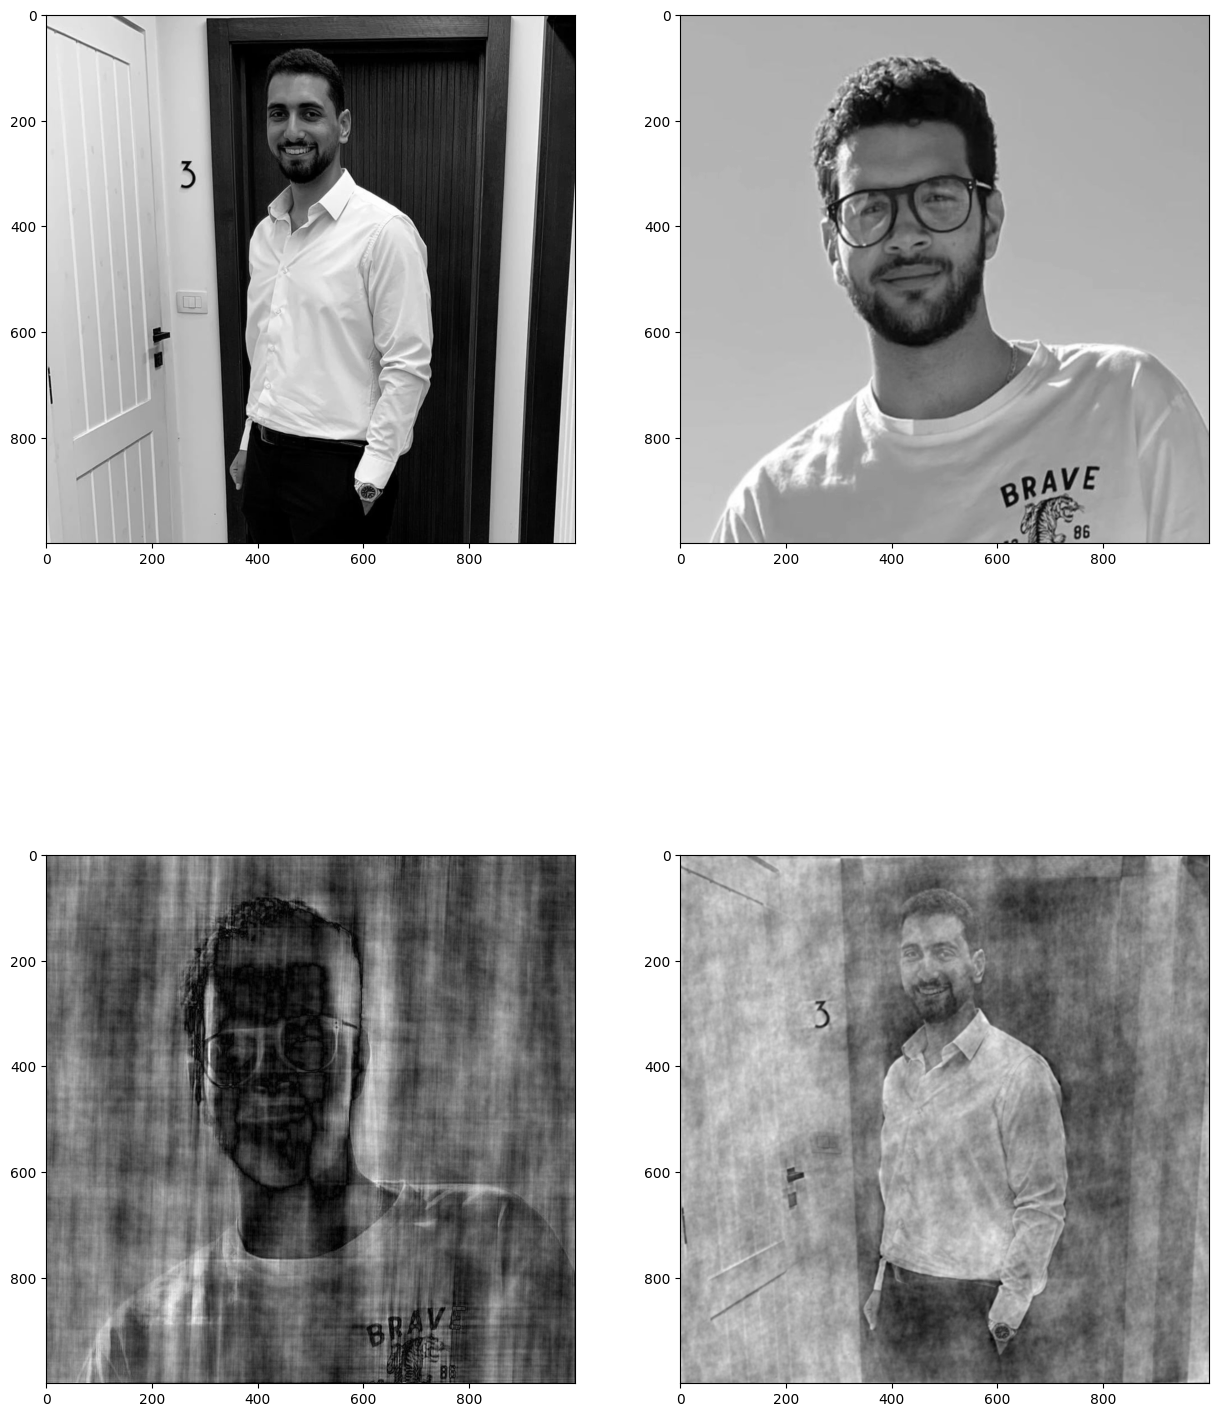

In [17]:
plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(np.abs(mahmoud_mag_mahmoud_phase_inv), cmap='gray')
plt.subplot(2,2,2)
plt.imshow(np.abs(ibrahim_mag_hema_phase_inv), cmap='gray')

plt.subplot(2,2,3)
plt.imshow(np.abs(mahmoud_mag_hema_phase_inv), cmap='gray')
plt.subplot(2,2,4)
plt.imshow(np.abs(hema_mag_mahmoud_phase_inv), cmap='gray')